# Practice Exercise Linear Regression
Welcome to the practice exercise on Linear Regression. We strongly recommend you try out all the questions/steps mentioned here and refer to the solution notebook later.

## Case Study: Boston Housing Price Prediction

### Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us. 

### Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below-

Attribute Information (in order):
- CRIM:     per capita crime rate by town
- ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS:    proportion of non-retail business acres per town
- CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:      nitric oxides concentration (parts per 10 million)
- RM:       average number of rooms per dwelling
- AGE:      proportion of owner-occupied units built prior to 1940
- DIS:      weighted distances to five Boston employment centres
- RAD:      index of accessibility to radial highways
- TAX:      full-value property-tax rate per 10,000 dollars
- PTRATIO:  pupil-teacher ratio by town
- LSTAT:    %lower status of the population
- MEDV:     Median value of owner-occupied homes in 1000 dollars.


**Importing Libraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error

/opt/anaconda3/envs/tf/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### <a id = "link1">Load the dataset</a>

In [5]:
house_data = pd.read_csv('Boston.csv')
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Check the shape of the dataset**

In [6]:
house_data.shape

(506, 13)

**Get the info data types column wise**

In [7]:
house_data.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX  ...  RAD  TAX  PTRATIO  LSTAT  MEDV
0    0.00632  18.0   2.31     0  0.538  ...    1  296     15.3   4.98  24.0
1    0.02731   0.0   7.07     0  0.469  ...    2  242     17.8   9.14  21.6
2    0.02729   0.0   7.07     0  0.469  ...    2  242     17.8   4.03  34.7
3    0.03237   0.0   2.18     0  0.458  ...    3  222     18.7   2.94  33.4
4    0.06905   0.0   2.18     0  0.458  ...    3  222     18.7   5.33  36.2
..       ...   ...    ...   ...    ...  ...  ...  ...      ...    ...   ...
501  0.06263   0.0  11.93     0  0.573  ...    1  273     21.0   9.67  22.4
502  0.04527   0.0  11.93     0  0.573  ...    1  273     21.0   9.08  20.6
503  0.06076   0.0  11.93     0  0.573  ...    1  273     21.0   5.64  23.9
504  0.10959   0.0  11.93     0  0.573  ...    1  273     21.0   6.48  22.0
505  0.04741   0.0  11.93     0  0.573  ...    1  273     21.0   7.88  11.9

[506 rows x 13 columns]>

**Get summary statistics around the numerical columns**

In [8]:
house_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
house_data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

### Univariate and Bivariate Analysis
Plot the distplots for the features and then plot scatterplots for features and the target variable 

To do - Identify insights if any from the distributuions.

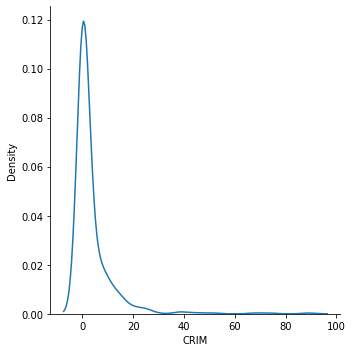

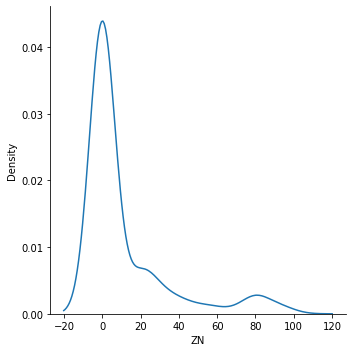

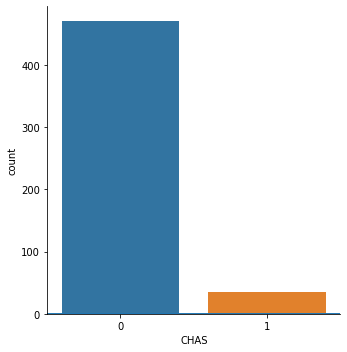

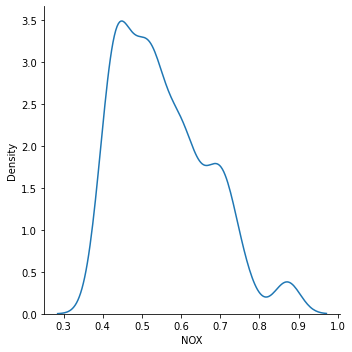

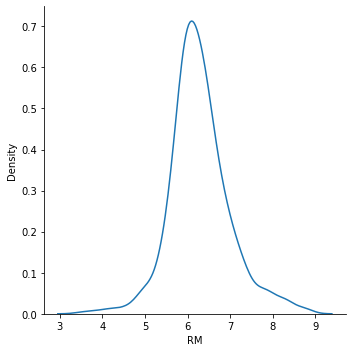

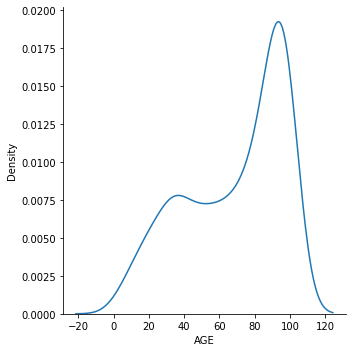

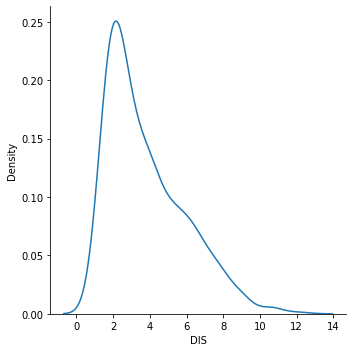

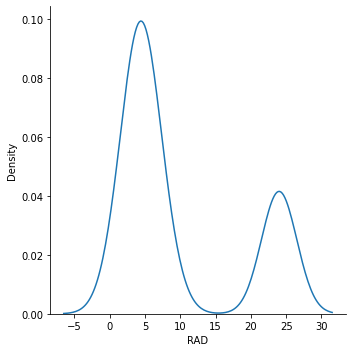

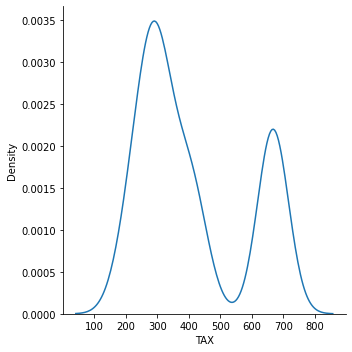

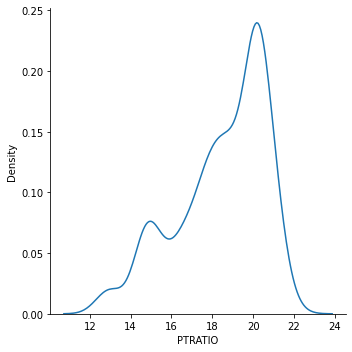

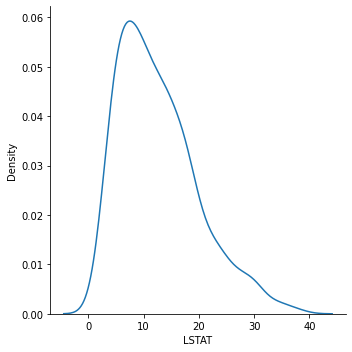

In [10]:
for col_name in house_data.columns:
    if col_name != 'MEDV':
        if col_name == 'CHAS':
            sns.countplot(house_data[col_name])
        else:
            sns.displot(house_data[col_name], kind='kde')

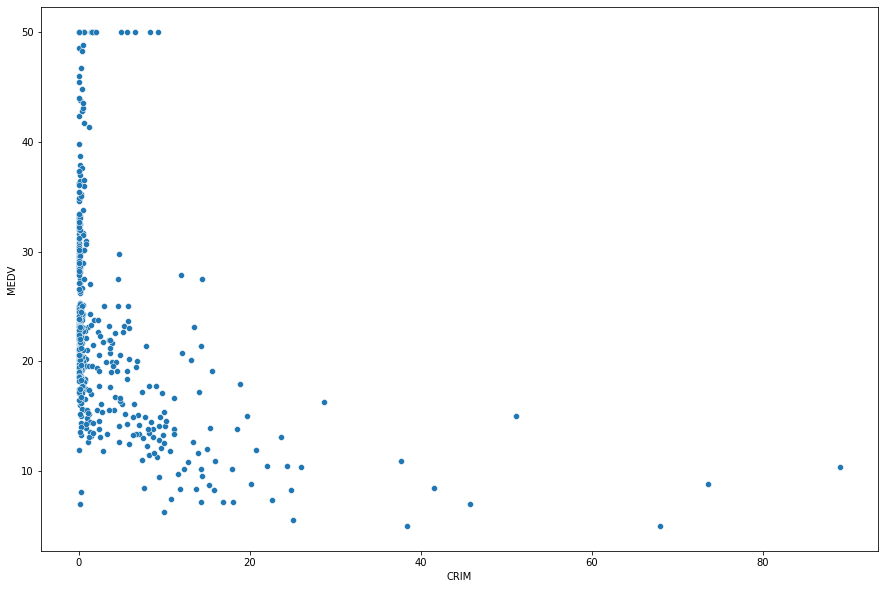

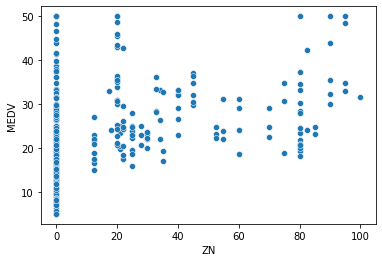

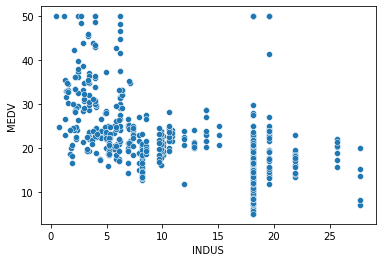

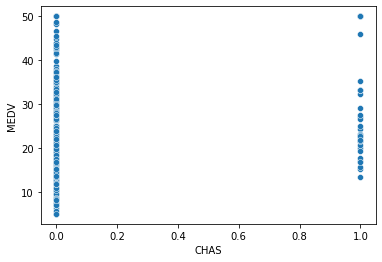

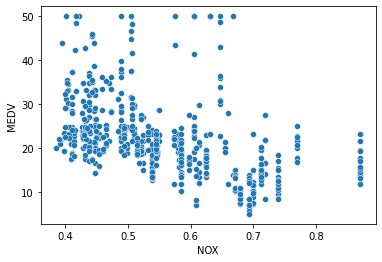

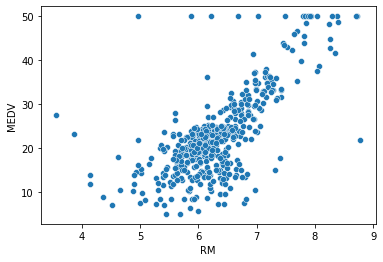

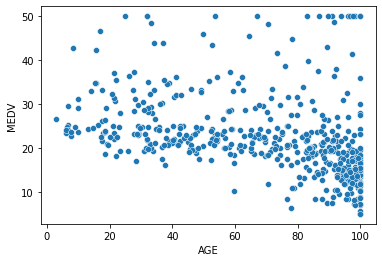

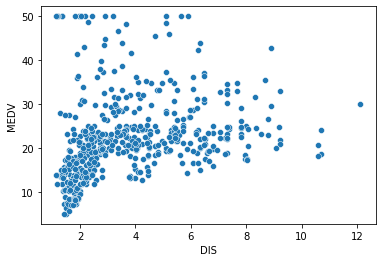

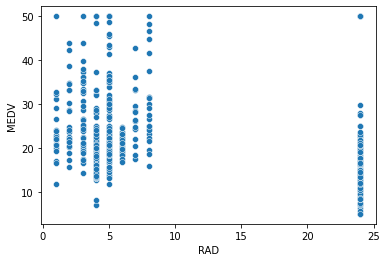

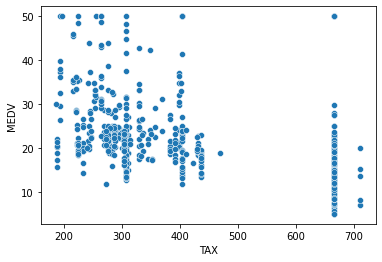

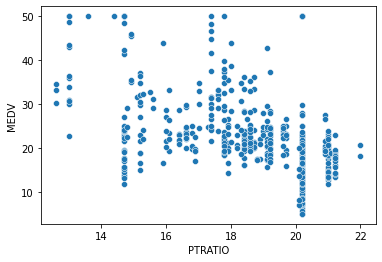

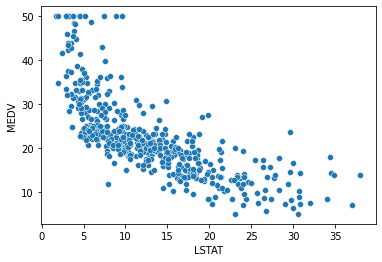

In [11]:
plt.figure(figsize=(15, 10))
for col_name in house_data.columns:
    if col_name != 'MEDV':
        sns.scatterplot(house_data[col_name], house_data['MEDV'])
        plt.show()

**Get the Correlation Heatmap**

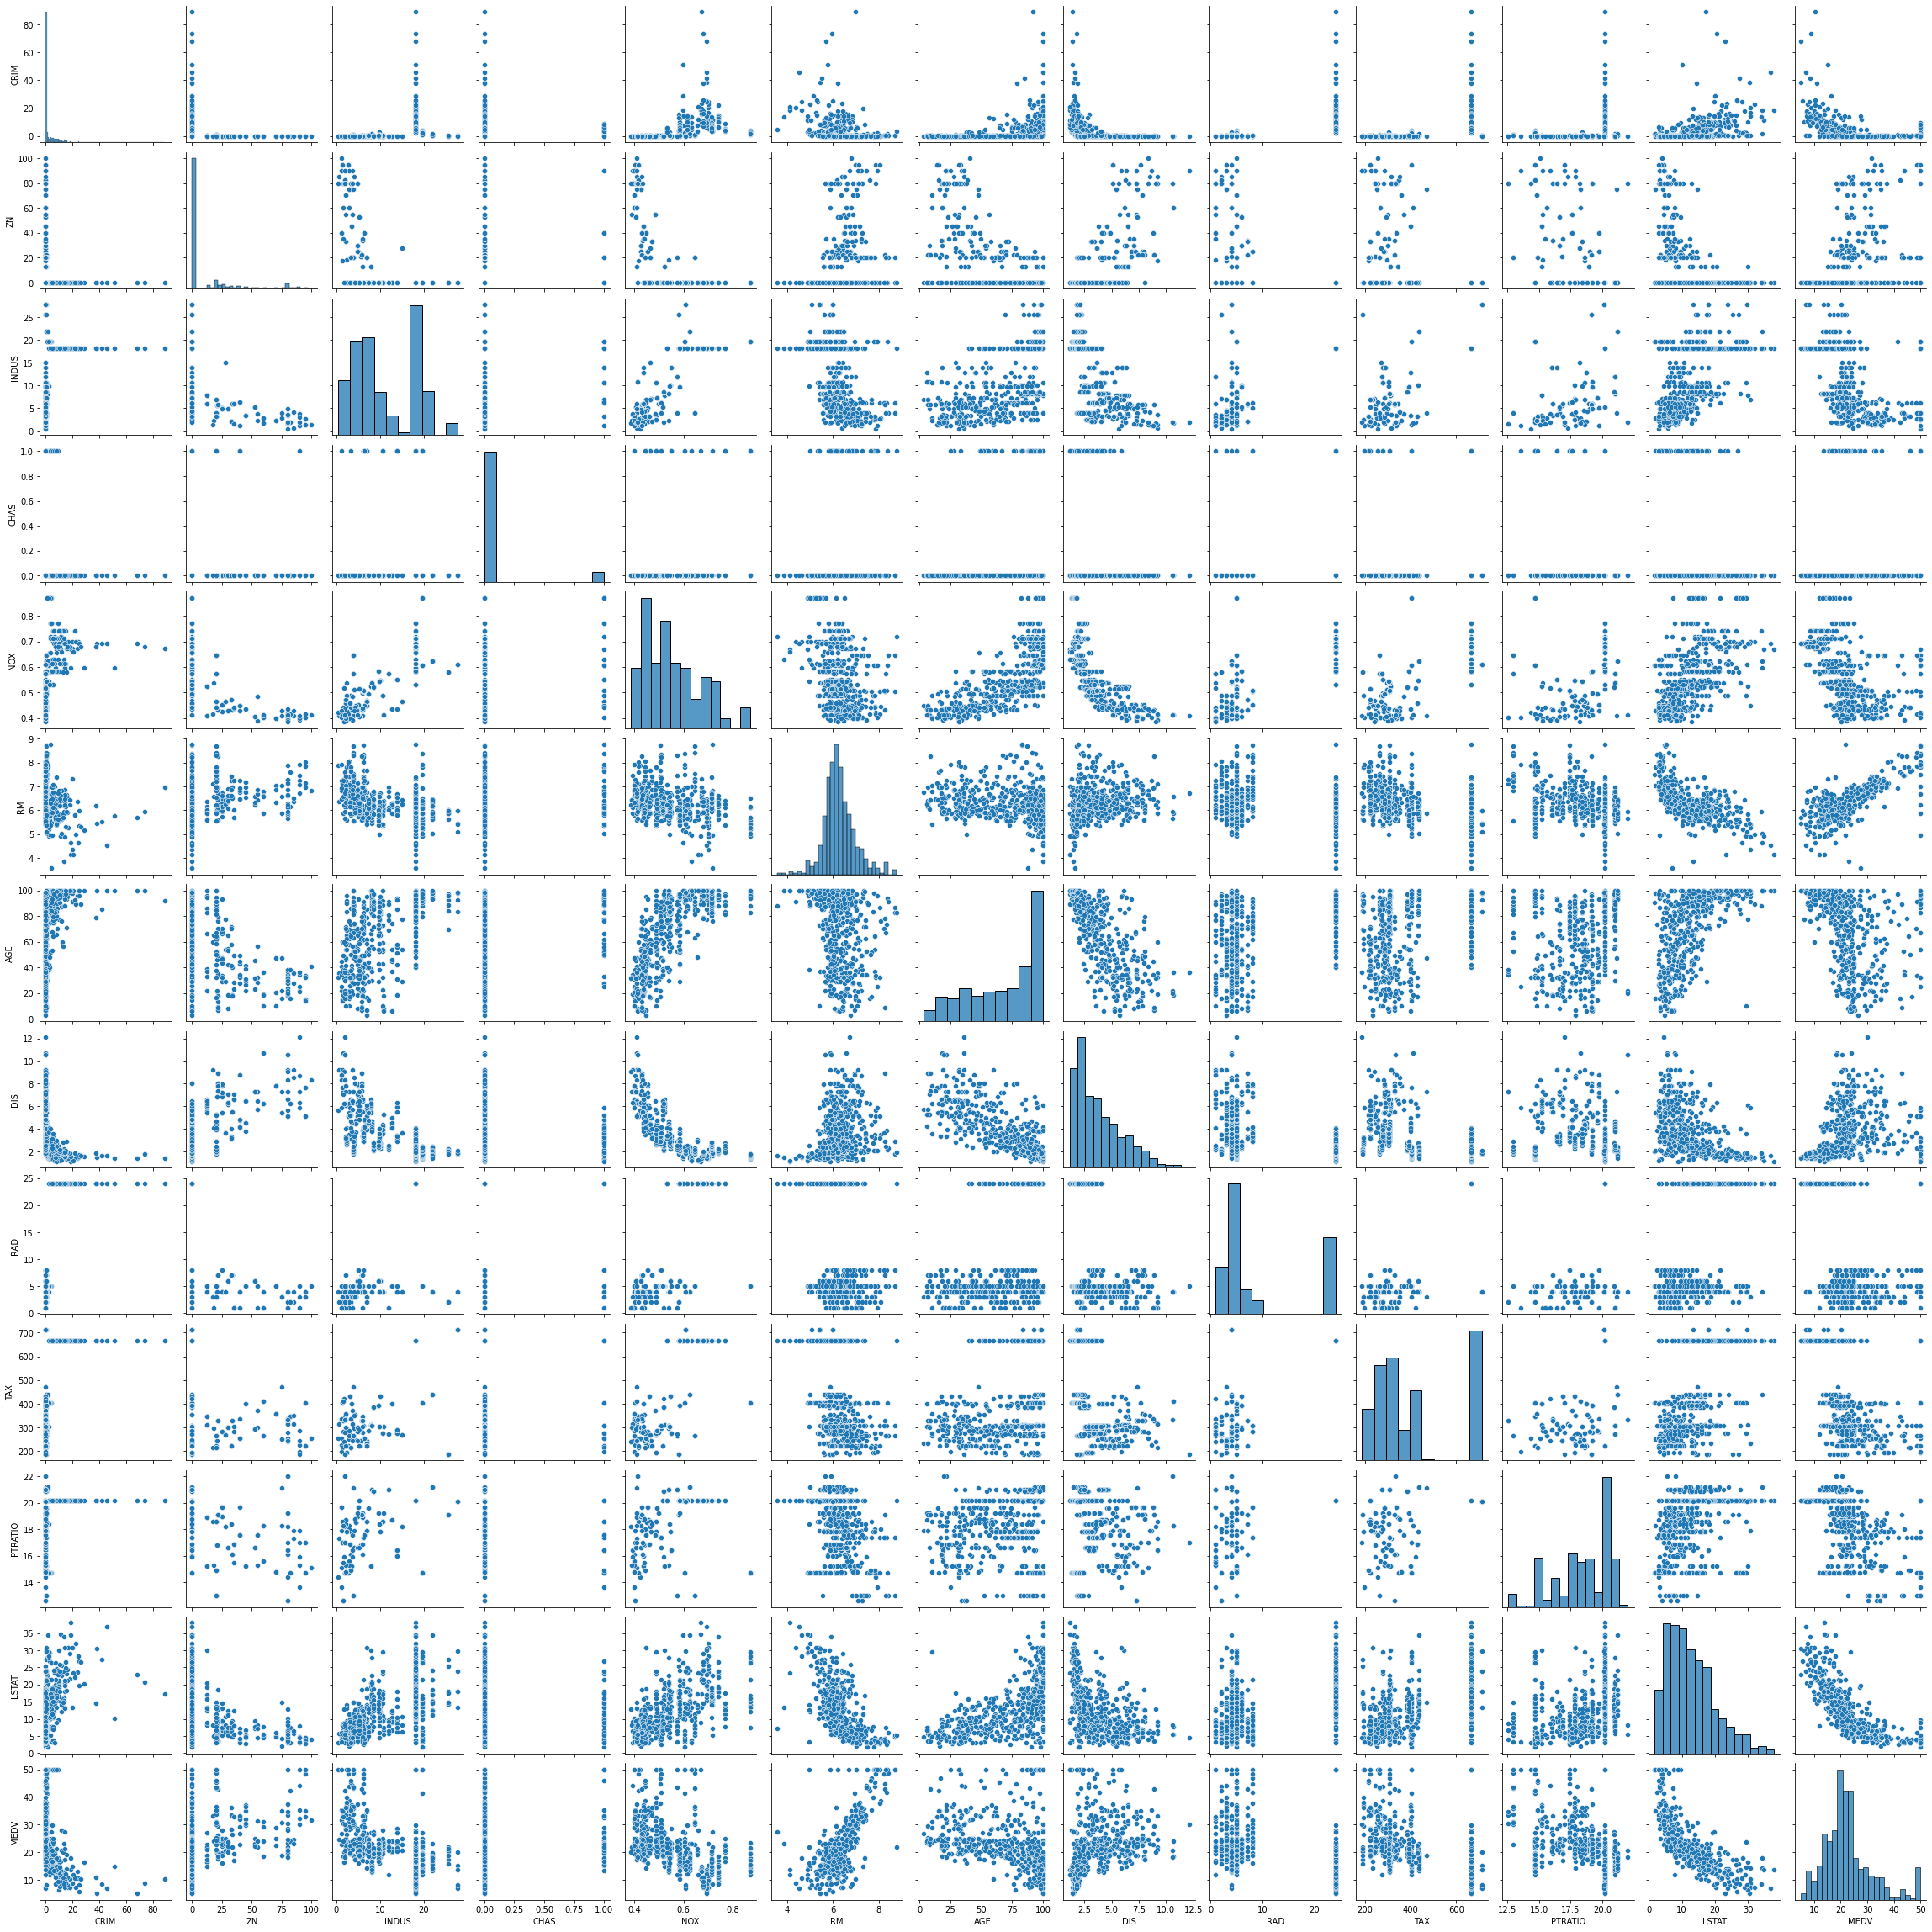

In [12]:
sns.pairplot(house_data)

<AxesSubplot:>

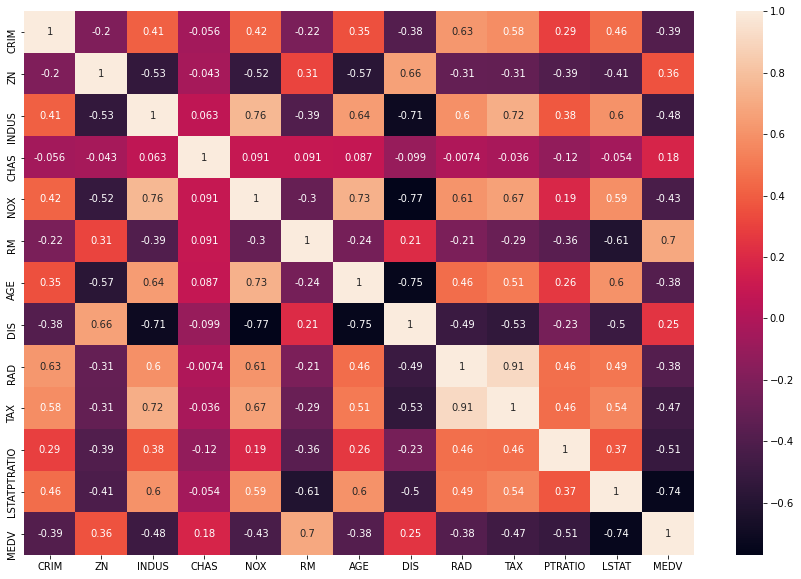

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(house_data.corr(), annot=True)

<AxesSubplot:>

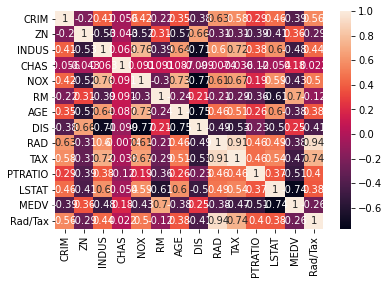

In [14]:
# Let us create a new feature using the TAX and RAD.
house_data['Rad/Tax'] = house_data['RAD']/house_data['TAX']
house_data.head()
sns.heatmap(house_data.corr(), annot=True)

### <a id = "link2">Split the dataset</a>
Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test set.

In [15]:
X = house_data.drop('MEDV', axis=1)
y = house_data['MEDV']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

### <a id = "link3">Using Linear Model from Scikit learn library</a>

**Fit the model to the training set**

In [17]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

**Get the score on training set**

In [13]:
linear_reg_model.score(X_train, y_train)

0.7077132931309869

**Write your own function for the r-squared score**

In [14]:
def rSquaredScore(x, y):
    mean_of_medv = y.mean()
    sst = sum(np.power((y-mean_of_medv),2))
    y_predict = linear_reg_model.predict(x)
    sse = sum(np.power((y-y_predict), 2))
    rSquared = 1 - (sse/sst)
    return rSquared
print('R^2 value for train data: {}'.format(rSquaredScore(X_train, y_train)))
print('R^2 value for test data: {}'.format(rSquaredScore(X_test, y_test)))

R^2 value for train data: 0.7077132931309873
R^2 value for test data: 0.7747487100790016


**Get the score on test set**

In [15]:
linear_reg_model.score(X_test, y_test)

0.7747487100790016

**Get the RMSE on test set**

In [25]:
def root_mean_squared_error(x, y):
    y_predict = linear_reg_model.predict(x)
    residuals = y-y_predict
    sum_of_residular_squares = sum(np.power(residuals,2))
    mean_of_sum_of_residular_squares = sum_of_residular_squares/len(y)
    rmse = math.sqrt(mean_of_sum_of_residular_squares)
    return rmse

print('RMSE on test set: {}'.format(root_mean_squared_error(X_test, y_test)))

RMSE on test set: 4.543708996703914


In [28]:
y_predict = linear_reg_model.predict(X_test)
print('RMSE using sklearn metrics on test set: {}'.format(math.sqrt(mean_squared_error(y_test, y_predict))))

RMSE using sklearn metrics on test set: 4.543708996703914


**Get model Coefficients**

In [31]:
coefficients = linear_reg_model.coef_
coefficients

array([-1.11645573e-01,  6.36226029e-02,  5.81601781e-02,  2.48126459e+00,
       -2.22884449e+01,  2.70504597e+00,  4.33320612e-03, -1.55384419e+00,
        1.63573149e-01, -8.75635417e-03, -9.76672579e-01, -5.84633370e-01,
        7.29228726e+01])

**Automate the equation of the fit**

In [37]:
y_predict_eqution = ''
for idx, col_name in enumerate(X_train.columns):
    y_predict_eqution = y_predict_eqution + str(coefficients[idx]) + '*' + col_name+'+'
y_predict_eqution = y_predict_eqution+str(linear_reg_model.intercept_)
print(y_predict_eqution)

-0.1116455734870058*CRIM+0.0636226029154487*ZN+0.05816017806553465*INDUS+2.4812645928411254*CHAS+-22.28844492809687*NOX+2.705045969347994*RM+0.0043332061246766805*AGE+-1.5538441948939106*DIS+0.16357314875579734*RAD+-0.008756354173498427*TAX+-0.9766725794264158*PTRATIO+-0.584633369854607*LSTAT+72.92287256820521*Rad/Tax+48.39603086438868


# Predicting Y values

In [47]:
def predict_y(x):
    y_prediction = np.zeros(X_test.shape[0])
    for idx, col_name in enumerate(X_train.columns):
        y_prediction = y_prediction + coefficients[idx]*x[col_name]
    y_prediction = y_prediction + linear_reg_model.intercept_
    return y_prediction
y_estimated = predict_y(X_test)
def rSquaredScore(x, y, y_predict):
    mean_of_medv = y.mean()
    sst = sum(np.power((y-mean_of_medv),2))
#     y_predict = linear_reg_model.predict(x)
    sse = sum(np.power((y-y_predict), 2))
    rSquared = 1 - (sse/sst)
    return rSquared
print(rSquaredScore(X_test, y_test,y_predict))
print(rSquaredScore(X_test, y_test,y_estimated))

0.7747487100790016
0.7747487100790015


# Dealing with Multicolinearity

In [51]:
X = house_data.drop(['ZN','CHAS','DIS','RAD','TAX','INDUS','AGE','MEDV'], axis=1)
X.head(), y.head()

(      CRIM    NOX     RM  PTRATIO  LSTAT   Rad/Tax
 0  0.00632  0.538  6.575     15.3   4.98  0.003378
 1  0.02731  0.469  6.421     17.8   9.14  0.008264
 2  0.02729  0.469  7.185     17.8   4.03  0.008264
 3  0.03237  0.458  6.998     18.7   2.94  0.013514
 4  0.06905  0.458  7.147     18.7   5.33  0.013514,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [54]:
print(linear_reg_model.score(X_train, y_train))
print(linear_reg_model.score(X_test, y_test))

0.6598797177590774
0.7327244796415047


In [91]:
corr_with_dependent_variable = house_data.corr()['MEDV'].abs(). reset_index().sort_values(by='MEDV', ascending=False)
corr_with_dependent_variable.drop(corr_with_dependent_variable[corr_with_dependent_variable['index'] =='MEDV'].index, axis=0,inplace=True)
X= house_data[corr_with_dependent_variable.head(7)['index']]
# X.drop(['INDUS', 'TAX'], axis=1, inplace=True)
X

,LSTAT,RM,PTRATIO,INDUS,TAX,NOX,CRIM
0,4.98,6.575,15.3,2.31,296,0.538,0.00632
1,9.14,6.421,17.8,7.07,242,0.469,0.02731
2,4.03,7.185,17.8,7.07,242,0.469,0.02729
3,2.94,6.998,18.7,2.18,222,0.458,0.03237
4,5.33,7.147,18.7,2.18,222,0.458,0.06905
...,...,...,...,...,...,...,...
501,9.67,6.593,21.0,11.93,273,0.573,0.06263
502,9.08,6.120,21.0,11.93,273,0.573,0.04527
503,5.64,6.976,21.0,11.93,273,0.573,0.06076
504,6.48,6.794,21.0,11.93,273,0.573,0.10959


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
print(linear_reg_model.score(X_train, y_train))
print(linear_reg_model.score(X_test, y_test))

0.6551529616101985
0.7178535319614157


## <a id = "link4">Bonus: Using Statsmodels OLS</a>

In [1]:
import sys

!{sys.executable} -m pip install statsmodels

     |████████████████████████████████| 9.6 MB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 6.2 MB/s eta 0:00:01


In [2]:
import statsmodels.api as sm

**Make the linear model using OLS**

In [20]:
X_con = sm.add_constant(X)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, y, test_size=0.3, random_state=1)  

model = sm.OLS(y_trainc, X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     63.33
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           1.66e-82
Time:                        07:13:48   Log-Likelihood:                -1062.8
No. Observations:                 354   AIC:                             2154.
Df Residuals:                     340   BIC:                             2208.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.3960      6.555      7.383      0.000      35.502      61.290
CRIM          -0.1116      0.043     -2.585      0.010      -0.197      -0.027
ZN             0.0636      0.019      3.344      0.001       0.026       0.101
INDUS          0.0582      0.077      0.751      0.453      -0.094       0.210
CHAS           2.4813      0.986      2.517      0.012       0.542       4.421
NOX          -22.2884      4.700     -4.742      0.000     -31.534     -13.043
RM             2.7050      0.521      5.191      0.000       1.680       3.730
AGE            0.0043      0.017      0.261      0.795      -0.028       0.037
DIS           -1.5538      0.260     -5.972      0.000      -2.066      -1.042
RAD            0.1636      0.232      0.705      0.481      -0.293       0.620
TAX           -0.0088      0.007     -1.344      0.180      -0.022       0.004
PTRATIO       -0.9767      0.173     -5.650      0.000      -1.317      -0.637
LSTAT         -0.5846      0.062     -9.500      0.000      -0.706      -0.464
Rad/Tax       72.9229    115.940      0.629      0.530    -155.127     300.973
==============================================================================
Omnibus:                      135.944   Durbin-Watson:                   1.851
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.381
Skew:                           1.641   Prob(JB):                    1.53e-121
Kurtosis:                       8.191   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Get the value of coefficient of determination**

In [21]:
print('The variation in the independent variable which is explained by the dependent variable is','\n',
      model.rsquared*100,'%')

The variation in the independent variable which is explained by the dependent variable is 
 70.77132931309868 %


**Get the Predictions on test set**

In [24]:
y_predict = model.predict(X_testc)

**Calculate MSE for training set**

In [26]:
mse = mean_squared_error(y_trainc, model.predict(X_trainc))
mse

23.730483930569747

**Get the RMSE on training set**

In [28]:
rmse = math.sqrt(mse)
rmse

4.871394454421623

**Get the RMSE on test set**

In [29]:
t_rmse = math.sqrt(mean_squared_error(y_testc, y_predict))
t_rmse

4.543708996703849